이번 과제는 **KNN 알고리즘**과 **K-Means 알고리즘**을 활용하여 데이터를 분석하는 것입니다.

과제는 두 가지 파트로 나누어져 있습니다:

#### 1. KNN 알고리즘 구현 및 분석
- 주어진 데이터셋을 로드한 후, 전처리와 EDA을 수행하세요.
  - [데이터 다운받기 : diabetes](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)
- KNN 알고리즘을 구현하고, 하이퍼파라미터 튜닝을 통해 최적의 성능을 내는 모델을 구축해 보세요.
  - 다양한 distance metric을 사용해보세요.
- 모델의 성능을 평가한 뒤, 다양한 지표를 사용해 결과를 해석하세요.
- 추가적으로 Weighted KNN과 같은 변형된 알고리즘도 적용해 보세요 :)

#### 2. K-Means 알고리즘 구현 및 분석
- 주어진 데이터셋을 로드한 후, 전처리와 EDA을 수행하세요.
  - [데이터 다운받기 : Facebook Live sellers](https://www.kaggle.com/datasets/ashishg21/facebook-live-sellers-in-thailand-uci-ml-repo)
- K-Means 알고리즘을 사용해 clustering을 수행하세요.
  - 다양한 cluster 개수를 가지고 실험해 보세요.
- clustering 결과를 시각화하고, Elbow Method나 Silhouette Score 등을 활용해 clustering의 성능을 평가하세요.
- 추가적으로 K-Means++를 사용해 clustering을 진행해 보세요 :)



---

In [53]:
# 본인이 필요한 라이브러리 추가

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, make_scorer
from sklearn.model_selection import GridSearchCV
import seaborn as sb
import numpy as np
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs


# 1. KNN 과제

## 1. 데이터 로드

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# 본인 데이터 저장 경로에 맞춰 수정하기

df = pd.read_csv("/content/drive/MyDrive/Tobigs 22nd/정규세션/week3/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 2. 데이터 전처리/EDA


In [7]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [8]:
# Feature Vector과 Target Variable 선언하기

# feature vector 선언
X = df.drop('Outcome', axis=1)

# target variable 선언
y = df['Outcome']

print("Feature vector (X):")
print(X.head(2))

print("\nTarget variable (y):")
print(y.head(2))

Feature vector (X):
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  

Target variable (y):
0    1
1    0
Name: Outcome, dtype: int64


In [9]:
# Normalization

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pd.DataFrame(X_scaled, columns=X.columns)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732


## 3. KNN 구현 & 파라미터 튜닝


In [10]:
train_x, test_x, train_y, test_y = train_test_split(X, y, shuffle=True, test_size=0.33)
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((514, 8), (514,), (254, 8), (254,))

In [11]:
# 그리드서치로 최적의 하이퍼파라미터 찾기
knn_params = {'n_neighbors':[3, 5, 7, 9, 11, 15],
           'metric':['euclidean', 'manhattan', 'minkowski', 'Mahalanobis', 'Hamming'],
           'p': [1,2]}

gridsearch_model = GridSearchCV(estimator=KNeighborsClassifier(),
                                param_grid=knn_params, # 값 목록
                                scoring=make_scorer(f1_score, average='micro'), # 평가지표
                                cv=5) # 교차검증 분할 수

gridsearch_model.fit(train_x, train_y) # 훈련(그리드서치)
print('최적 하이퍼파라미터 :', gridsearch_model.best_params_)

최적 하이퍼파라미터 : {'metric': 'manhattan', 'n_neighbors': 11, 'p': 1}


## 4. 평가

f1 score 값 :  0.7244094488188977


<Axes: >

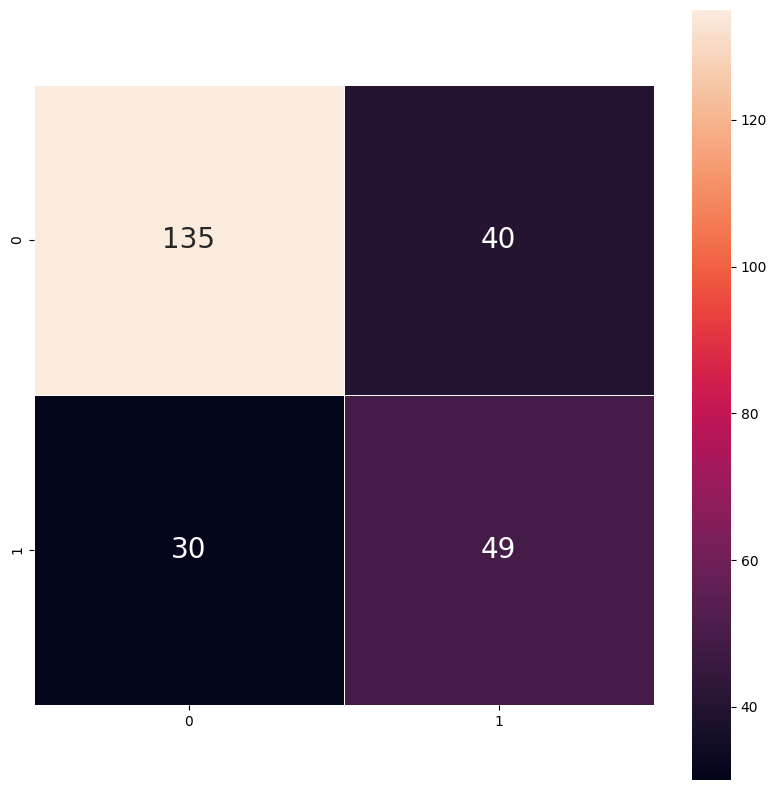

In [12]:
# 예측 및 평가
pred_y = gridsearch_model.best_estimator_.predict(test_x)
print('f1 score 값 : ', f1_score(test_y, pred_y, average='micro'))

# 혼동행렬 시각화
confusion_ = confusion_matrix(pred_y, test_y)
plt.figure(figsize=(10,10))
sb.heatmap(confusion_, annot=True, annot_kws={"size": 20}, fmt=".0f", linewidths=.5, square = True)

In [64]:
# Weighted KNN

# KNN 파라미터 그리드
knn_params = {
    'n_neighbors': [3, 5, 7, 9, 11, 15],
    'weights': ['distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2]
}

gridsearch_model = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=knn_params,  # 값 목록
    scoring=make_scorer(f1_score, average='micro'),  # 평가지표
    cv=5  # 교차검증 분할 수
)

gridsearch_model.fit(train_x, train_y) # 훈련 (그리드서치)
print('최적 하이퍼파라미터 :', gridsearch_model.best_params_)

최적 하이퍼파라미터 : {'metric': 'manhattan', 'n_neighbors': 11, 'p': 1, 'weights': 'distance'}


---
# 2. K-Means 과제

## 1. 데이터 로드

In [13]:
# 본인 데이터 저장 경로에 맞춰 수정하기

df = pd.read_csv("/content/drive/MyDrive/Tobigs 22nd/정규세션/week3/Live.csv")
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [15]:
df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,0.0,0.0,0.0,0.0
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191,NaN,NaN,NaN,NaN
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812,NaN,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000,NaN,NaN,NaN,NaN


## 2. 데이터 전처리/EDA

In [16]:
df.isnull().sum()

,0
status_id,0
status_type,0
status_published,0
num_reactions,0
num_comments,0
num_shares,0
num_likes,0
num_loves,0
num_wows,0
num_hahas,0


In [17]:
# 중복된 4개의 열 삭제
df.drop(columns=['Column1', 'Column2', 'Column3', 'Column4'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   object
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 661.1+ KB


In [18]:
df.status_id.value_counts()

,count
status_id,
819700534875473_957599447752247,2
819700534875473_972433889602136,2
819700534875473_981835315328660,2
819700534875473_980941638751361,2
819700534875473_978746665637525,2
...,...
246675545449582_264078163709320,1
246675545449582_264081010375702,1
246675545449582_264089710374832,1


In [19]:
df.status_published.value_counts()

,count
status_published,
3/20/2018 1:54,3
12/28/2017 8:09,2
4/30/2018 6:20,2
4/26/2018 19:00,2
4/23/2018 7:26,2
...,...
9/6/2012 9:01,1
9/6/2012 9:16,1
9/6/2012 23:17,1


In [20]:
df.status_type.value_counts()

,count
status_type,
photo,4288
video,2334
status,365
link,63


In [21]:
# 데이터셋의 총 인스턴스 수가 7050개인데, status_id 변수에는 6997개의 고유한 라벨이, status_published에는 6913개의 고유한 라벨이 있다.
# 이 변수들은 거의 모든 인스턴스에 대해 고유한 식별자 역할을 하므로, 분석에 큰 의미가 없기 때문에 삭제한다.
df.drop(columns=['status_id', 'status_published'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   status_type    7050 non-null   object
 1   num_reactions  7050 non-null   int64 
 2   num_comments   7050 non-null   int64 
 3   num_shares     7050 non-null   int64 
 4   num_likes      7050 non-null   int64 
 5   num_loves      7050 non-null   int64 
 6   num_wows       7050 non-null   int64 
 7   num_hahas      7050 non-null   int64 
 8   num_sads       7050 non-null   int64 
 9   num_angrys     7050 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 550.9+ KB


In [47]:
# 'status_type' 변수를 인코딩한 후 클러스터링을 하였을 때 결과가 안정적이지 않아 변수를 삭제하기로 결정하였다.
df.drop(columns=['status_type'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   num_reactions  7050 non-null   int64
 1   num_comments   7050 non-null   int64
 2   num_shares     7050 non-null   int64
 3   num_likes      7050 non-null   int64
 4   num_loves      7050 non-null   int64
 5   num_wows       7050 non-null   int64
 6   num_hahas      7050 non-null   int64
 7   num_sads       7050 non-null   int64
 8   num_angrys     7050 non-null   int64
dtypes: int64(9)
memory usage: 495.8 KB


In [48]:
# Feature Vector 선언하기

# feature vector 선언
X = df

print("Feature vector (X):")
print(X.head(2))

Feature vector (X):
   num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  \
0            529           512         262        432         92         3   
1            150             0           0        150          0         0   

   num_hahas  num_sads  num_angrys  
0          1         1           0  
1          0         0           0  


In [49]:
# Normalization

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pd.DataFrame(X_scaled, columns=X.columns)

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,0.646104,0.323350,1.686879,0.482727,1.983266,0.196196,0.076713,0.473570,-0.155748
1,-0.173192,-0.252206,-0.304144,-0.144720,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748
2,-0.006738,0.013089,0.129017,-0.024571,0.206938,-0.033187,0.076713,-0.152587,-0.155748
3,-0.257499,-0.252206,-0.304144,-0.231495,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748
4,-0.037003,-0.252206,-0.304144,-0.024571,-0.093286,-0.147879,-0.176010,-0.152587,-0.155748
...,...,...,...,...,...,...,...,...,...
7045,-0.305057,-0.252206,-0.304144,-0.280445,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748
7046,-0.462863,-0.252206,-0.304144,-0.447319,-0.293436,-0.147879,0.076713,-0.152587,-0.155748
7047,-0.493128,-0.252206,-0.304144,-0.476244,-0.293436,-0.147879,-0.176010,-0.152587,-0.155748
7048,0.261316,-0.238717,-0.136959,0.298053,-0.268417,-0.147879,-0.176010,-0.152587,-0.155748


## 3. K-Means 구현 & 파라미터 튜닝

In [ ]:
# 아래 4번과 함께 진행하였습니다.

## 4. 평가

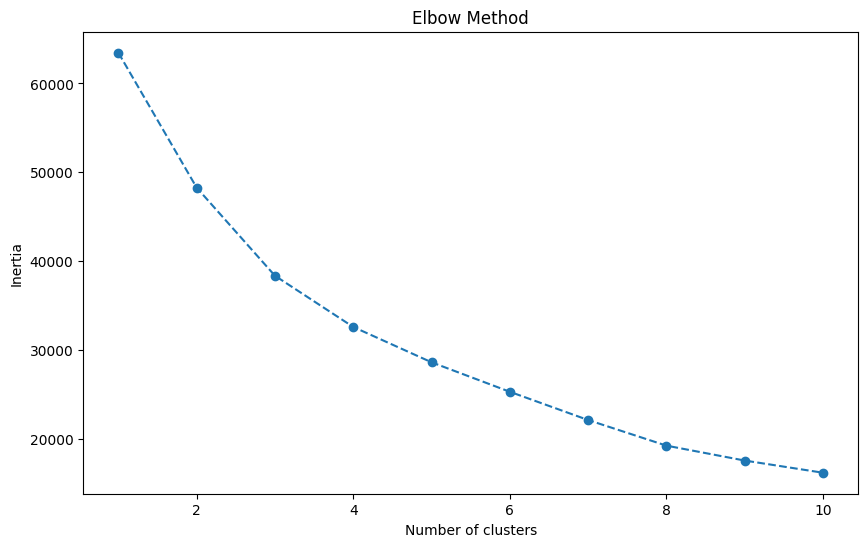

In [50]:
# elbow method

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# 그림에서 급격하게 감소하다가 감소율이 줄어드는 지점이 k=2일 때 이므로, 최적의 k=2이다.

In [52]:
# silhouette method

sil_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    labels = kmeans.labels_
    sil_score = silhouette_score(X_scaled, labels)
    sil_scores.append(sil_score)
    print(f"Silhouette Score for {k} clusters: {sil_score}")

# 최적의 k 찾기
best_k = range(2, 11)[np.argmax(sil_scores)]
print()
print(f"Optimal number of clusters: {best_k}")

Silhouette Score for 2 clusters: 0.8157664963353164
Silhouette Score for 3 clusters: 0.7499921477392748
Silhouette Score for 4 clusters: 0.7577030782310119
Silhouette Score for 5 clusters: 0.7585339534922507
Silhouette Score for 6 clusters: 0.7132320821360976
Silhouette Score for 7 clusters: 0.7197087816847654
Silhouette Score for 8 clusters: 0.7137662878219053
Silhouette Score for 9 clusters: 0.7083572079886016
Silhouette Score for 10 clusters: 0.6893944378994106

Optimal number of clusters: 2


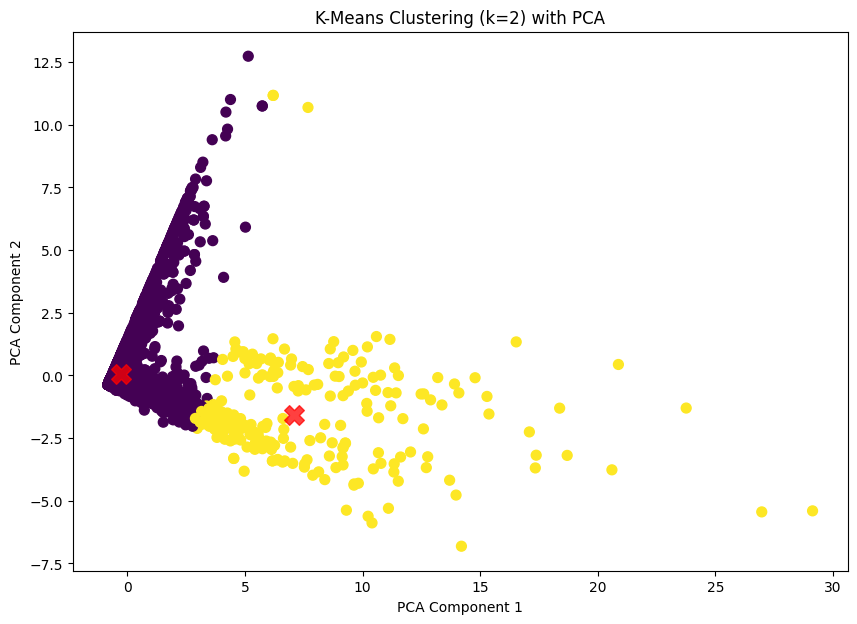

In [54]:
# k=2 시각화

# KMeans 클러스터링
kmeans = KMeans(n_clusters=2)
y_kmeans = kmeans.fit_predict(X_scaled)

# PCA로 2D로 차원 축소
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 시각화
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis', s=50)
plt.scatter(pca.transform(kmeans.cluster_centers_)[:, 0], pca.transform(kmeans.cluster_centers_)[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('K-Means Clustering (k=2) with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

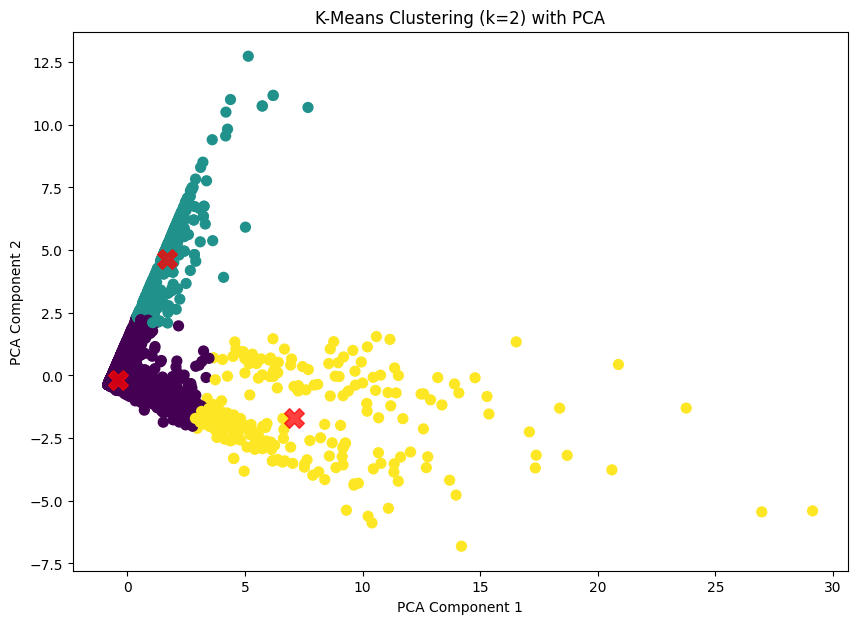

In [61]:
# k-Means++ (k=3)

# K-Means++ 클러스터링
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X_scaled)

# PCA로 2D로 차원 축소
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 시각화
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis', s=50)
plt.scatter(pca.transform(kmeans.cluster_centers_)[:, 0], pca.transform(kmeans.cluster_centers_)[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('K-Means Clustering (k=2) with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()